![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Read Data From Multiple ICOS BM Files (1-row header)
</b>
</span>

---
**Notebook version**: `1` (23 Apr 2023)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch) 

ICOS BM files contain raw bio-meteorological data.

## Using pre-defined filetype `ICOS_H1R_CSVZIP_1MIN`
- This filetype is pre-defined
- It has a 1-row header section with variable names
- It is a zipped `csv` file
- Time resolution is 1MIN
- Timestamp is in the first column and has the format `%Y%m%d%H%M%S`, showing the END of the averaging interval
- Timestamp is converted to show the MIDDLE of the averaging interval during reading

# Imports

In [1]:
from diive.core.io.filereader import MultiDataFileReader, search_files

C:\Users\holukas\AppData\Local\pypoetry\Cache\virtualenvs\diive-7H5NxUqg-py3.9\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Source folder
- All files were collected in a folder

In [2]:
FOLDER = r"F:\Sync\luhk_work\_current\icos_rdd_CH-Dav\L22F03"
filepaths = search_files(FOLDER, "*.zip")

# Read all files in folder
All files are automatically merged in this step.

In [3]:
loaddatafile = MultiDataFileReader(filetype='ICOS-H1R-CSVZIP-1MIN', filepaths=filepaths)

Reading file CH-Dav_BM_20220701_L22_F03.zip ...
Reading file CH-Dav_BM_20220702_L22_F03.zip ...
Reading file CH-Dav_BM_20220703_L22_F03.zip ...
Reading file CH-Dav_BM_20220704_L22_F03.zip ...
Reading file CH-Dav_BM_20220705_L22_F03.zip ...
Reading file CH-Dav_BM_20220706_L22_F03.zip ...
Reading file CH-Dav_BM_20220707_L22_F03.zip ...
Reading file CH-Dav_BM_20220708_L22_F03.zip ...
Reading file CH-Dav_BM_20220709_L22_F03.zip ...
Reading file CH-Dav_BM_20220710_L22_F03.zip ...
Reading file CH-Dav_BM_20220711_L22_F03.zip ...
Reading file CH-Dav_BM_20220712_L22_F03.zip ...
Reading file CH-Dav_BM_20220713_L22_F03.zip ...
Reading file CH-Dav_BM_20220714_L22_F03.zip ...
Reading file CH-Dav_BM_20220715_L22_F03.zip ...
Reading file CH-Dav_BM_20220716_L22_F03.zip ...
Reading file CH-Dav_BM_20220717_L22_F03.zip ...
Reading file CH-Dav_BM_20220718_L22_F03.zip ...
Reading file CH-Dav_BM_20220719_L22_F03.zip ...
Reading file CH-Dav_BM_20220720_L22_F03.zip ...
Reading file CH-Dav_BM_20220721_L22_F03.

# Results

In [4]:
df = loaddatafile.data_df

In [5]:
df

,P_1_1_1,RH_1_6_2,TA_1_6_2
TIMESTAMP_MIDDLE,,,
2022-07-01 00:01:30,0.0,97.7,13.4
2022-07-01 00:02:30,0.0,97.8,13.4
2022-07-01 00:03:30,0.0,98.1,13.3
2022-07-01 00:04:30,0.0,98.2,13.3
2022-07-01 00:05:30,0.0,98.4,13.3
...,...,...,...
2023-02-28 23:55:30,0.0,76.1,-5.8
2023-02-28 23:56:30,0.0,75.5,-5.8
2023-02-28 23:57:30,0.0,74.9,-5.7


## Plot some data

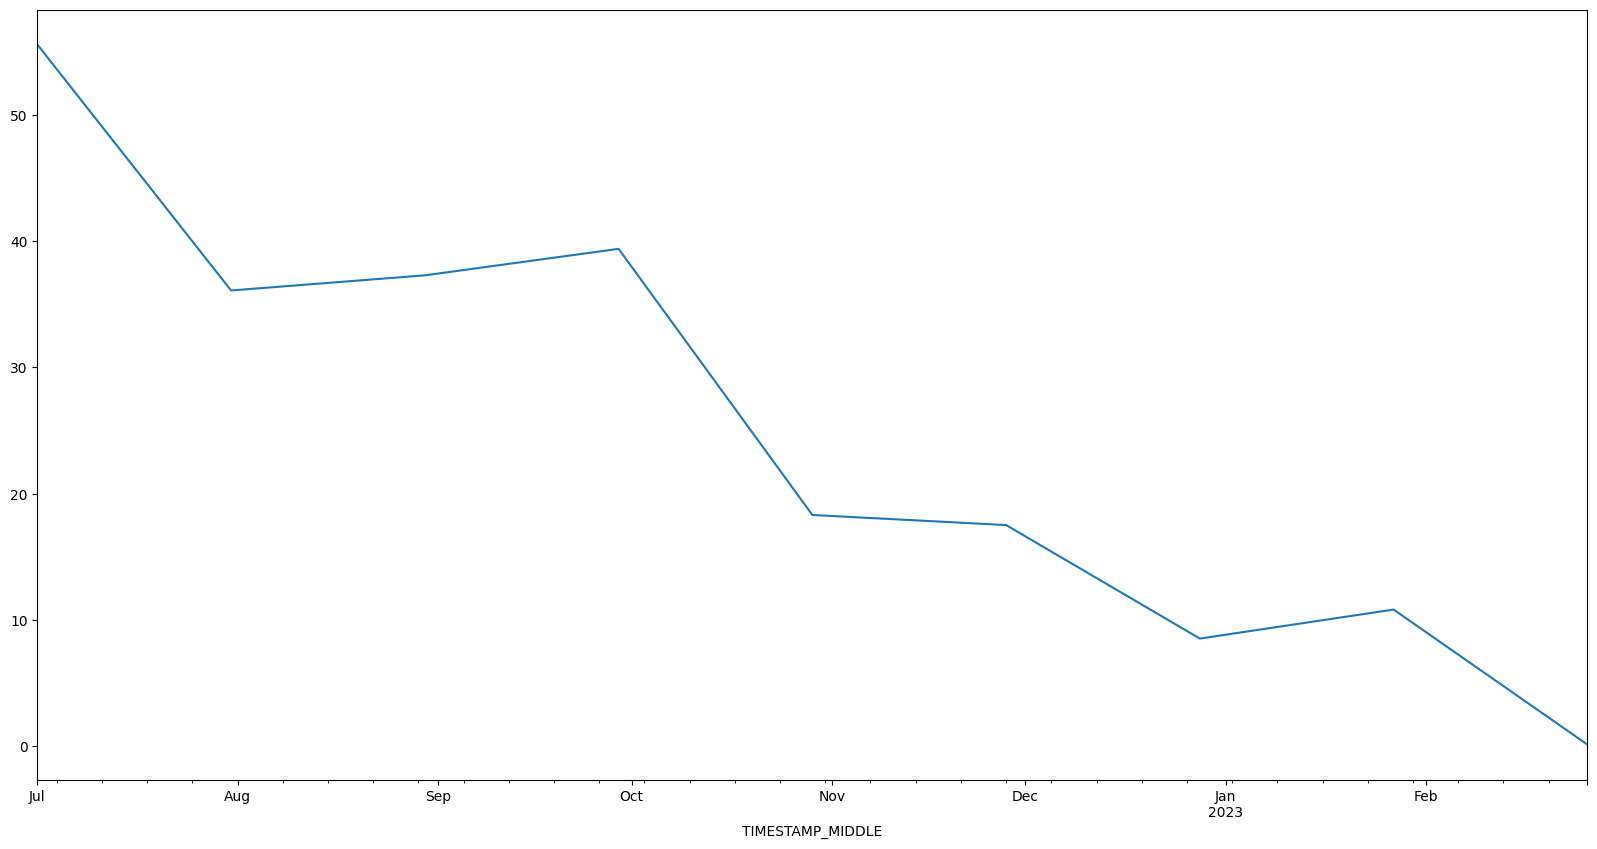

In [13]:
df['P_1_1_1'].resample('30D').sum().plot(figsize=(20, 10));

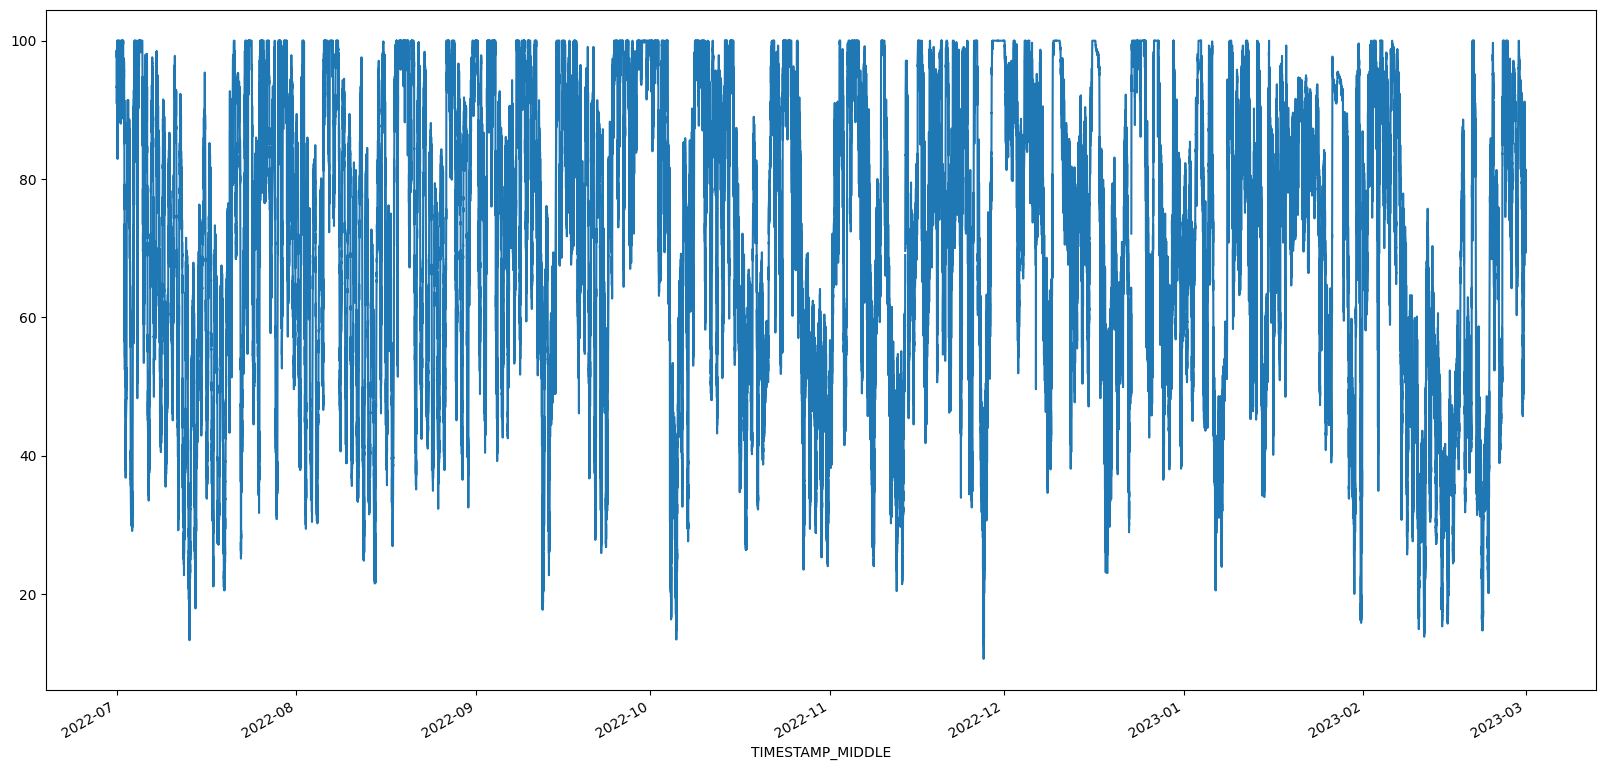

In [7]:
df['RH_1_6_2'].plot(figsize=(20, 10));

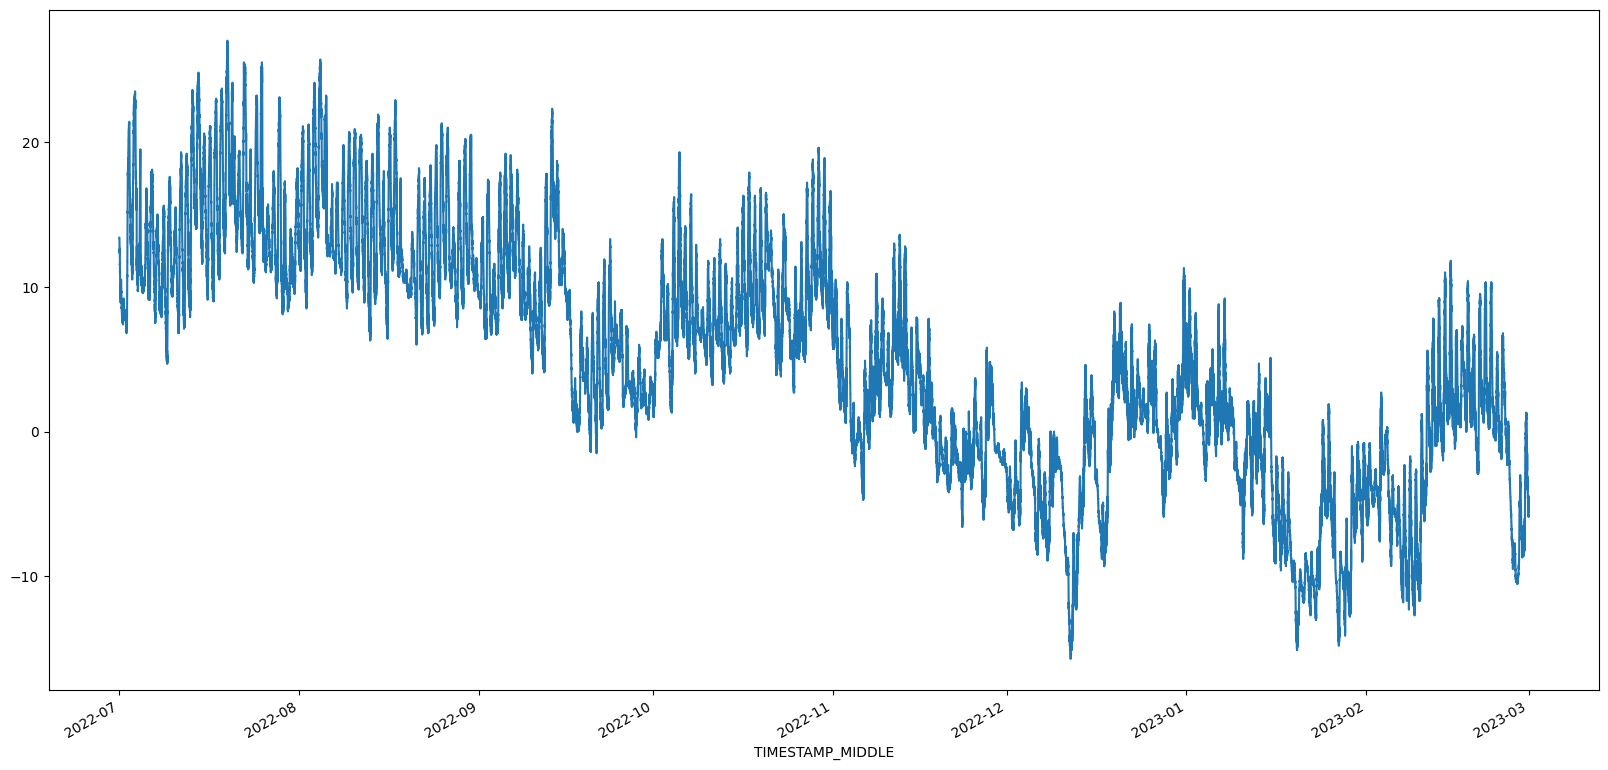

In [8]:
df['TA_1_6_2'].plot(figsize=(20, 10));

## Number of missing values

In [9]:
for col in df.columns:
    n_total = len(df[col])
    n_missing = df[col].isnull().sum()
    perc_missing = (n_missing / n_total) * 100
    print(f"{col}: {n_missing} missing records  ({perc_missing:.1f}% missing) /  {n_total} total records")

P_1_1_1: 261 missing records  (0.1% missing) /  349919 total records
RH_1_6_2: 261 missing records  (0.1% missing) /  349919 total records
TA_1_6_2: 261 missing records  (0.1% missing) /  349919 total records


# Finish

In [10]:
from datetime import datetime
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2023-04-23 19:22:52
